## Problem Definition & Objective

### Selected Project Track
AI for Business & Market Analysis

### Problem Statement
Online retail businesses generate large volumes of transactional data, but this raw data is difficult to interpret without proper analysis. Businesses often struggle to understand sales trends, customer behavior, and product demand patterns from unprocessed datasets.

### Objective
The objective of this project is to analyze retail transaction data using AI-driven data analytics techniques to:
- Identify sales trends over time
- Analyze top-performing products and countries
- Understand customer spending behavior
- Support data-driven market decisions

### Real-World Relevance
Market analysis helps businesses improve inventory planning, revenue optimization, and strategic decision-making.

## Data Understanding & Preparation

### Dataset Source
Public online retail transaction dataset (CSV format).

### Data Loading
The dataset is loaded locally using the Pandas library.

### Data Cleaning & Preprocessing
- Removal of missing values (CustomerID, Description)
- Removal of duplicate records
- Filtering invalid values (negative quantity and price)
- Date parsing and validation

### Feature Engineering
- TotalSales = Quantity × UnitPrice
- Extraction of Month and Year from InvoiceDate


In [2]:
from google.colab import files
uploaded = files.upload()


Saving online_retail.csv to online_retail.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------- LOAD DATA ----------------
df = pd.read_csv(
    "online_retail.csv",
    encoding="ISO-8859-1"
)

print("First 5 rows:")
print(df.head())

print("\nInitial Shape:")
print(df.shape)

print("\nInitial Info:")
df.info()

# ---------------- DATA CLEANING ----------------
print("\nMissing values before cleaning:")
print(df.isnull().sum())

df = df.dropna(subset=["CustomerID", "Description"])
df = df.drop_duplicates()
df = df[df["Quantity"] > 0]
df = df[df["UnitPrice"] > 0]

# ---------------- DATE CONVERSION ----------------
df["InvoiceDate"] = pd.to_datetime(
    df["InvoiceDate"],
    dayfirst=True,
    errors="coerce"
)

# Drop rows where date parsing failed
df = df.dropna(subset=["InvoiceDate"])

# ---------------- FEATURE ENGINEERING ----------------
df["TotalSales"] = df["Quantity"] * df["UnitPrice"]
df["Month"] = df["InvoiceDate"].dt.month
df["Year"] = df["InvoiceDate"].dt.year

# ---------------- FINAL OUTPUT ----------------
print("\nFinal Info:")
df.info()

print("\nFinal Shape:")
print(df.shape)

print("\nFinal 5 rows:")
print(df.head())


First 5 rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom  
2  01-12-2010 08:26       2.75     17850.0  United Kingdom  
3  01-12-2010 08:26       3.39     17850.0  United Kingdom  
4  01-12-2010 08:26       3.39     17850.0  United Kingdom  

Initial Shape:
(541909, 8)

Initial Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count  


Descriptive Statistics:
            Quantity                    InvoiceDate      UnitPrice  \
count  392692.000000                         392692  392692.000000   
mean       13.119702  2011-07-10 19:13:07.771892480       3.125914   
min         1.000000            2010-12-01 08:26:00       0.001000   
25%         2.000000            2011-04-07 11:12:00       1.250000   
50%         6.000000            2011-07-31 12:02:00       1.950000   
75%        12.000000            2011-10-20 12:53:00       3.750000   
max     80995.000000            2011-12-09 12:50:00    8142.750000   
std       180.492832                            NaN      22.241836   

          CustomerID     TotalSales          Month           Year  
count  392692.000000  392692.000000  392692.000000  392692.000000  
mean    15287.843865      22.631500       7.601871    2010.934631  
min     12346.000000       0.001000       1.000000    2010.000000  
25%     13955.000000       4.950000       5.000000    2011.000000  
50% 

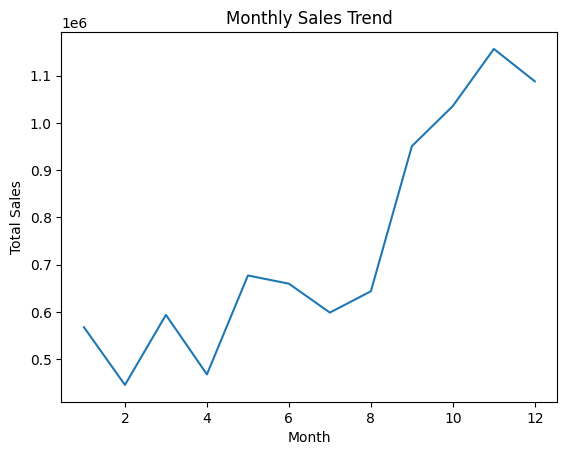

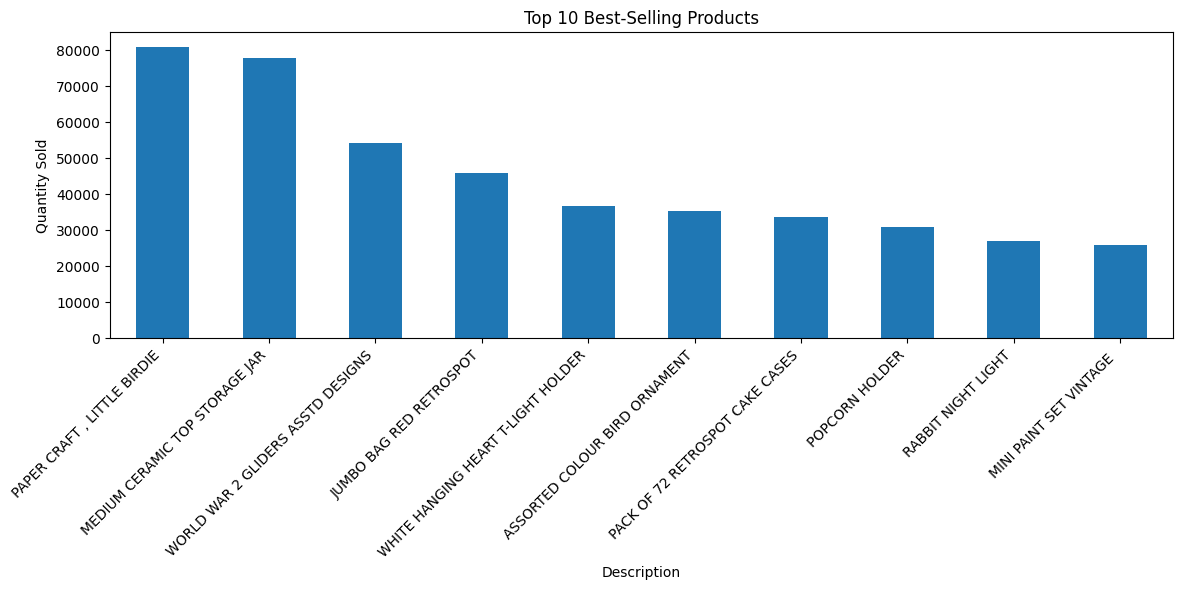

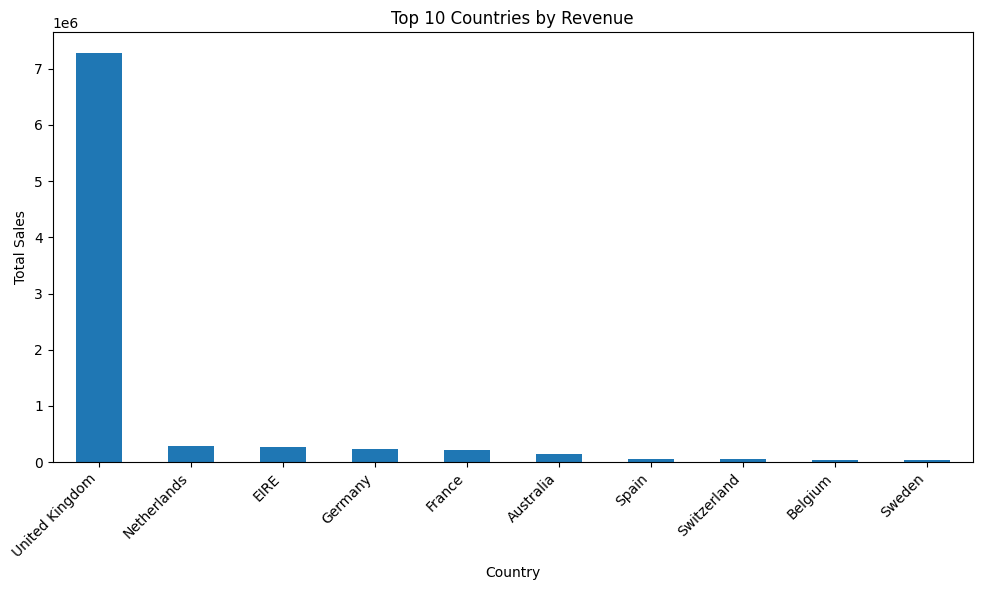

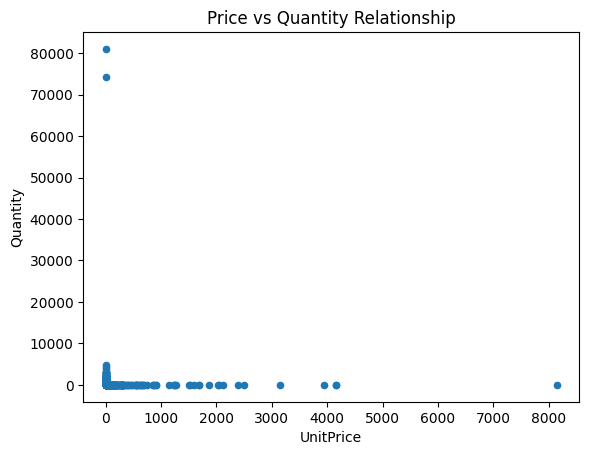

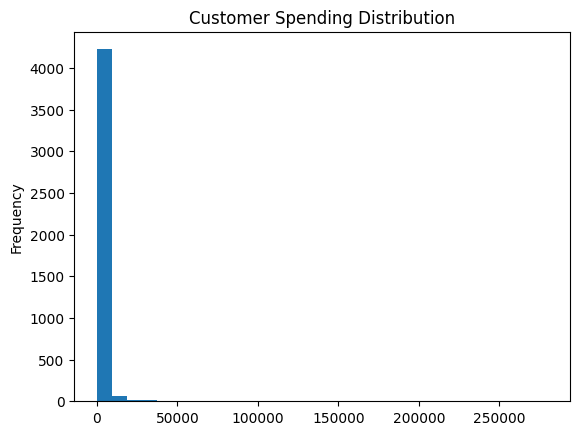

In [4]:
# ---------------- DESCRIPTIVE STATISTICS ----------------
print("\nDescriptive Statistics:")
print(df.describe())

# ---------------- MONTHLY SALES TREND ----------------
monthly_sales = df.groupby("Month")["TotalSales"].sum()

monthly_sales.plot(
    kind="line",
    title="Monthly Sales Trend",
    ylabel="Total Sales",
    xlabel="Month"
)

plt.show()

# ---------------- TOP 10 PRODUCTS ----------------
top_products = (
    df.groupby("Description")["Quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 6))
top_products.plot(
    kind="bar",
    title="Top 10 Best-Selling Products",
    ylabel="Quantity Sold"
)

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# ---------------- TOP 10 COUNTRIES ----------------
country_sales = (
    df.groupby("Country")["TotalSales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
country_sales.plot(
    kind="bar",
    title="Top 10 Countries by Revenue",
    ylabel="Total Sales"
)

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# ---------------- PRICE vs QUANTITY ----------------
df.plot.scatter(
    x="UnitPrice",
    y="Quantity",
    title="Price vs Quantity Relationship"
)

plt.show()

# ---------------- CUSTOMER SPENDING DISTRIBUTION ----------------
customer_sales = df.groupby("CustomerID")["TotalSales"].sum()

customer_sales.plot(
    kind="hist",
    bins=30,
    title="Customer Spending Distribution"
)

plt.show()


## Model / System Design

### AI Technique Used
AI-driven Data Analytics and Exploratory Data Analysis (EDA).

No predictive ML model is trained. The system focuses on pattern discovery and insight generation.

### Architecture / Pipeline
1. Load raw retail transaction data
2. Clean and preprocess data
3. Perform feature engineering
4. Generate descriptive statistics
5. Visualize trends and patterns

### Design Justification
This approach ensures transparency, interpretability, and meaningful business insights without unnecessary model complexity.


## Evaluation & Analysis

### Metrics Used
- Descriptive statistics
- Sales aggregation
- Visual trend analysis

### Sample Outputs
- Monthly sales trend line plot
- Top 10 best-selling products bar chart
- Top revenue-generating countries
- Customer spending distribution histogram

### Performance & Limitations
The system effectively identifies trends and patterns. However, it does not perform prediction or forecasting and depends on historical data quality.


## Ethical Considerations & Responsible AI

### Bias & Fairness
The dataset may reflect regional or customer-specific purchasing biases.

### Dataset Limitations
- Historical data only
- No demographic attributes
- External market factors not included

### Responsible AI Usage
No personal or sensitive user data is used. Analysis is performed on anonymized transaction data.


## Conclusion & Future Scope

### Conclusion
This project demonstrates how AI-driven data analysis can extract valuable market insights from retail transaction data.

### Future Improvements
- Sales forecasting using time-series models
- Customer segmentation using clustering
- Interactive dashboards using Streamlit or Power BI
